In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# PyTorch with Triton 3.1.0
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [ ]:
!mkdir -p /usr/local/lib
!ln -sf /usr/lib64-nvidia/libcuda.so /usr/local/lib/libcuda.so

In [ ]:
!find /usr -name "build.py" | grep triton

/usr/local/lib/python3.11/dist-packages/triton/runtime/build.py


In [ ]:
path = "/usr/local/lib/python3.11/dist-packages/triton/runtime/build.py"

with open(path, "r") as f:
    lines = f.readlines()

patched_lines = []
for line in lines:
    if "dirs = [" in line:
        patched_lines.append('    dirs = ["/usr/lib64-nvidia", "/usr/local/lib"]  # patched\n')
    elif "assert any(os.path.exists(" in line:
        patched_lines.append('    # assertion disabled for libcuda.so\n')
    else:
        patched_lines.append(line)

with open(path, "w") as f:
    f.writelines(patched_lines)

print("✅ Triton 3.1.0 patched for Colab CUDA.")


✅ Triton 3.1.0 patched for Colab CUDA.


In [ ]:
import os
os.environ["TRITON_DEBUG"] = "1"
os.environ["LD_LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["PATH"] += ":/usr/local/lib"

import triton
import triton.language as tl
import torch

@triton.jit
def add_kernel(X_ptr, Y_ptr, Z_ptr, N: tl.constexpr):
    pid = tl.program_id(0)
    if pid >= N:
        return
    x = tl.load(X_ptr + pid)
    y = tl.load(Y_ptr + pid)
    tl.store(Z_ptr + pid, x + y)

# Test kernel
size = 1024
X = torch.rand(size, device='cuda')
Y = torch.rand(size, device='cuda')
Z = torch.empty(size, device='cuda')

add_kernel[(size,)](X, Y, Z, N=size)
print("✅ Triton 3.x kernel executed successfully!")
print(Z[:5])

✅ Triton 3.x kernel executed successfully!
tensor([0.2942, 0.6988, 0.6277, 1.1983, 1.1322], device='cuda:0')


[INFO] Model initialized. Triton should log kernel compilation now.


[GPU MONITOR] 0% GPU, 18435 MiB


loss,█▂▁
mrr@10,▁▆█
ndcg@10,▁▆█
recall@10,▁▆█
loss,53201.99075
mrr@10,0.11173
ndcg@10,0.14004
recall@10,0.23279


[GPU MONITOR] 0% GPU, 18435 MiB
Dataset: 10M
Length of ratings: 10000054
Shape: (10000054, 6)
Num users: 69878, Num items: 10677
Length of the ratings: 10000054
Shape of the ratings dataframe: (10000054, 6)
   user_id  movie_id  rating  timestamp                          title  \
0        0         0     5.0  838983339                 Aladdin (1992)   
1        0         1     5.0  838983392           Dumb & Dumber (1994)   
2        0         2     5.0  838983392                Stargate (1994)   
3        0         3     5.0  838983392  Star Trek: Generations (1994)   
4        0         4     5.0  838983421                Outbreak (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Musical  
1                                       Comedy  
2                      Action|Adventure|Sci-Fi  
3                Action|Adventure|Drama|Sci-Fi  
4                 Action|Drama|Sci-Fi|Thriller  
{np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.in

[GPU MONITOR] 0% GPU, 18435 MiB



Using device: cuda
GPU: NVIDIA A100-SXM4-40GB
Memory: 42.47 GB
Tue Jun  3 08:33:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             49W /  400W |   18435MiB /  40960MiB |      0%      Default |
|                                         |                        |        

Epoch 1:   2%|▏         | 169/9561 [00:17<14:56, 10.47it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1:  13%|█▎        | 1233/9561 [01:59<13:15, 10.47it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1:  15%|█▍        | 1425/9561 [02:17<12:58, 10.45it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1:  26%|██▌       | 2489/9561 [03:59<11:16, 10.46it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1:  28%|██▊       | 2681/9561 [04:17<10:56, 10.48it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1:  39%|███▉      | 3743/9561 [05:59<09:14, 10.49it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 1:  41%|████      | 3937/9561 [06:17<08:55, 10.50it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1:  52%|█████▏    | 4999/9561 [07:59<07:17, 10.44it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1:  54%|█████▍    | 5191/9561 [08:17<06:56, 10.50it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 1:  65%|██████▌   | 6255/9561 [09:59<05:14, 10.51it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 1:  67%|██████▋   | 6447/9561 [10:17<04:57, 10.48it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 1:  79%|███████▊  | 7511/9561 [11:59<03:15, 10.47it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1:  81%|████████  | 7703/9561 [12:17<02:58, 10.43it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1:  92%|█████████▏| 8767/9561 [13:59<01:15, 10.48it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1:  94%|█████████▎| 8959/9561 [14:17<00:57, 10.44it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 1: 100%|██████████| 9561/9561 [15:16<00:00, 10.43it/s]


Epoch 1 | Loss: 58557.88 | Recall@10: 0.2070 (14462/69878) | MRR@10: 0.0970 | NDCG@10: 0.1227
Saved new best model (Recall@10 = 0.2070) to best_model_10M.pt


Epoch 2:   4%|▍         | 399/9561 [00:39<14:37, 10.44it/s]

[GPU MONITOR] 94% GPU, 18435 MiB


Epoch 2:   6%|▌         | 591/9561 [00:58<14:15, 10.48it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 2:  17%|█▋        | 1655/9561 [02:39<12:39, 10.40it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 2:  19%|█▉        | 1847/9561 [02:58<12:16, 10.48it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 2:  30%|███       | 2911/9561 [04:39<10:37, 10.43it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 2:  32%|███▏      | 3103/9561 [04:58<10:15, 10.50it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 2:  44%|████▎     | 4167/9561 [06:39<08:35, 10.46it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 2:  46%|████▌     | 4359/9561 [06:58<08:15, 10.50it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 2:  57%|█████▋    | 5421/9561 [08:39<06:35, 10.47it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 2:  59%|█████▊    | 5613/9561 [08:58<06:17, 10.45it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 2:  70%|██████▉   | 6677/9561 [10:39<04:36, 10.43it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 2:  72%|███████▏  | 6869/9561 [10:58<04:16, 10.51it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 2:  83%|████████▎ | 7933/9561 [12:39<02:36, 10.39it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 2:  85%|████████▍ | 8125/9561 [12:58<02:16, 10.51it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 2:  96%|█████████▌| 9187/9561 [14:39<00:35, 10.40it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 2:  98%|█████████▊| 9379/9561 [14:58<00:17, 10.49it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 2: 100%|██████████| 9561/9561 [15:16<00:00, 10.43it/s]


Epoch 2 | Loss: 54298.71 | Recall@10: 0.2250 (15722/69878) | MRR@10: 0.1068 | NDCG@10: 0.1344
Saved new best model (Recall@10 = 0.2250) to best_model_10M.pt


Epoch 3:   9%|▊         | 819/9561 [01:19<13:57, 10.43it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  11%|█         | 1009/9561 [01:38<13:42, 10.39it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  22%|██▏       | 2071/9561 [03:20<11:55, 10.47it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 3:  24%|██▎       | 2261/9561 [03:38<11:38, 10.44it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  35%|███▍      | 3325/9561 [05:20<09:57, 10.44it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  37%|███▋      | 3515/9561 [05:38<09:38, 10.45it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  48%|████▊     | 4579/9561 [07:19<07:55, 10.47it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  50%|████▉     | 4771/9561 [07:38<07:39, 10.42it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  61%|██████    | 5833/9561 [09:19<05:57, 10.44it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  63%|██████▎   | 6025/9561 [09:38<05:37, 10.48it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  74%|███████▍  | 7089/9561 [11:19<03:57, 10.43it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  76%|███████▌  | 7281/9561 [11:38<03:38, 10.44it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  87%|████████▋ | 8343/9561 [13:19<01:57, 10.39it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 3:  89%|████████▉ | 8535/9561 [13:38<01:37, 10.49it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 3: 100%|██████████| 9561/9561 [15:17<00:00, 10.42it/s]


[GPU MONITOR] 89% GPU, 18435 MiB
Epoch 3 | Loss: 53237.35 | Recall@10: 0.2324 (16243/69878) | MRR@10: 0.1124 | NDCG@10: 0.1405
Saved new best model (Recall@10 = 0.2324) to best_model_10M.pt


Epoch 4:   2%|▏         | 168/9561 [00:17<15:02, 10.41it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 4:  13%|█▎        | 1232/9561 [01:59<13:16, 10.46it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 4:  15%|█▍        | 1424/9561 [02:17<12:58, 10.46it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 4:  26%|██▌       | 2486/9561 [03:59<11:17, 10.44it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 4:  28%|██▊       | 2678/9561 [04:17<10:57, 10.47it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 4:  39%|███▉      | 3744/9561 [05:59<09:19, 10.39it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 4:  41%|████      | 3936/9561 [06:17<08:56, 10.48it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 4:  52%|█████▏    | 4998/9561 [07:59<07:15, 10.48it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 4:  54%|█████▍    | 5190/9561 [08:17<06:56, 10.51it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 4:  65%|██████▌   | 6254/9561 [09:59<05:17, 10.41it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 4:  67%|██████▋   | 6444/9561 [10:17<04:58, 10.43it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 4:  79%|███████▊  | 7508/9561 [11:59<03:17, 10.39it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 4:  81%|████████  | 7700/9561 [12:17<02:58, 10.43it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 4:  92%|█████████▏| 8764/9561 [13:59<01:16, 10.47it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 4:  94%|█████████▎| 8956/9561 [14:17<00:57, 10.46it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 4: 100%|██████████| 9561/9561 [15:16<00:00, 10.43it/s]


Epoch 4 | Loss: 52606.32 | Recall@10: 0.2383 (16652/69878) | MRR@10: 0.1143 | NDCG@10: 0.1433
Saved new best model (Recall@10 = 0.2383) to best_model_10M.pt


Epoch 5:   4%|▍         | 397/9561 [00:39<14:36, 10.46it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:   6%|▌         | 587/9561 [00:57<14:17, 10.47it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:  17%|█▋        | 1651/9561 [02:39<12:36, 10.46it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:  19%|█▉        | 1843/9561 [02:57<12:18, 10.44it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:  30%|███       | 2905/9561 [04:39<10:35, 10.48it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:  32%|███▏      | 3097/9561 [04:57<10:16, 10.49it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 5:  44%|████▎     | 4161/9561 [06:39<08:35, 10.48it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:  46%|████▌     | 4353/9561 [06:57<08:21, 10.38it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 5:  57%|█████▋    | 5417/9561 [08:39<06:36, 10.46it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:  59%|█████▊    | 5607/9561 [08:57<06:19, 10.43it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:  70%|██████▉   | 6671/9561 [10:39<04:37, 10.42it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 5:  72%|███████▏  | 6863/9561 [10:57<04:18, 10.42it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:  83%|████████▎ | 7927/9561 [12:39<02:35, 10.49it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 5:  85%|████████▍ | 8121/9561 [12:57<02:16, 10.55it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:  96%|█████████▌| 9189/9561 [14:39<00:35, 10.48it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 5:  98%|█████████▊| 9381/9561 [14:57<00:17, 10.54it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 5: 100%|██████████| 9561/9561 [15:16<00:00, 10.43it/s]


Epoch 5 | Loss: 52163.18 | Recall@10: 0.2424 (16938/69878) | MRR@10: 0.1176 | NDCG@10: 0.1468
Saved new best model (Recall@10 = 0.2424) to best_model_10M.pt


Epoch 6:   9%|▊         | 827/9561 [01:20<13:51, 10.50it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 6:  11%|█         | 1019/9561 [01:38<13:30, 10.53it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 6:  22%|██▏       | 2085/9561 [03:20<11:49, 10.54it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 6:  24%|██▍       | 2277/9561 [03:38<11:36, 10.46it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 6:  35%|███▍      | 3341/9561 [05:20<09:54, 10.47it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 6:  37%|███▋      | 3533/9561 [05:38<09:37, 10.43it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 6:  48%|████▊     | 4595/9561 [07:20<07:51, 10.53it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 6:  50%|█████     | 4787/9561 [07:38<07:33, 10.52it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 6:  61%|██████    | 5851/9561 [09:20<05:56, 10.42it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 6:  63%|██████▎   | 6043/9561 [09:38<05:34, 10.51it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 6:  74%|███████▍  | 7109/9561 [11:20<03:53, 10.50it/s]

[GPU MONITOR] 95% GPU, 18435 MiB


Epoch 6:  76%|███████▋  | 7301/9561 [11:38<03:34, 10.52it/s]

[GPU MONITOR] 97% GPU, 18435 MiB


Epoch 6:  87%|████████▋ | 8365/9561 [13:20<01:54, 10.49it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 6:  89%|████████▉ | 8555/9561 [13:38<01:36, 10.47it/s]

[GPU MONITOR] 96% GPU, 18435 MiB


Epoch 6: 100%|██████████| 9561/9561 [15:16<00:00, 10.44it/s]


Epoch 6 | Loss: 51827.07 | Recall@10: 0.2440 (17049/69878) | MRR@10: 0.1197 | NDCG@10: 0.1488
Saved new best model (Recall@10 = 0.2440) to best_model_10M.pt

 Loading best model from: best_model_10M.pt


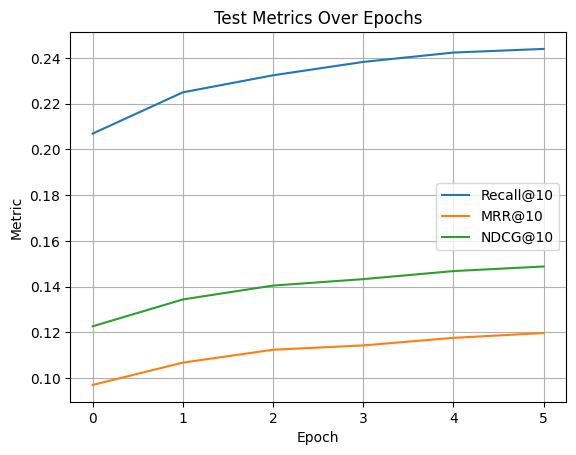


Total run time: 94.00 minutes

User ID: 3
Input sequence:
  - Item 180: Shakespeare in Love (1998)
  - Item 1689: Analyze This (1999)
  - Item 3843: Cookie's Fortune (1999)
  - Item 444: Aliens (1986)
  - Item 146: Amadeus (1984)
  - Item 214: Back to the Future (1985)
  - Item 449: Back to the Future Part II (1989)
  - Item 2116: Atlantic City (1980)
  - Item 71: Batman (1989)
  - Item 992: Beetlejuice (1988)
  - Item 993: Big (1988)
  - Item 137: Blade Runner (1982)
  - Item 616: Blues Brothers, The (1980)
  - Item 1047: Blue Velvet (1986)
  - Item 1058: Big Chill, The (1983)
  - Item 166: Brazil (1985)
  - Item 2203: Chariots of Fire (1981)
  - Item 2199: Broadcast News (1987)
  - Item 652: Conan the Barbarian (1982)
  - Item 41: Dead Poets Society (1989)
  - Item 1046: Dangerous Liaisons (1988)
  - Item 441: Dark Crystal, The (1982)
  - Item 3887: Crimes of the Heart (1986)
  - Item 2206: Crimes and Misdemeanors (1989)
  - Item 815: Die Hard (1988)
  - Item 1043: Down by Law (1986

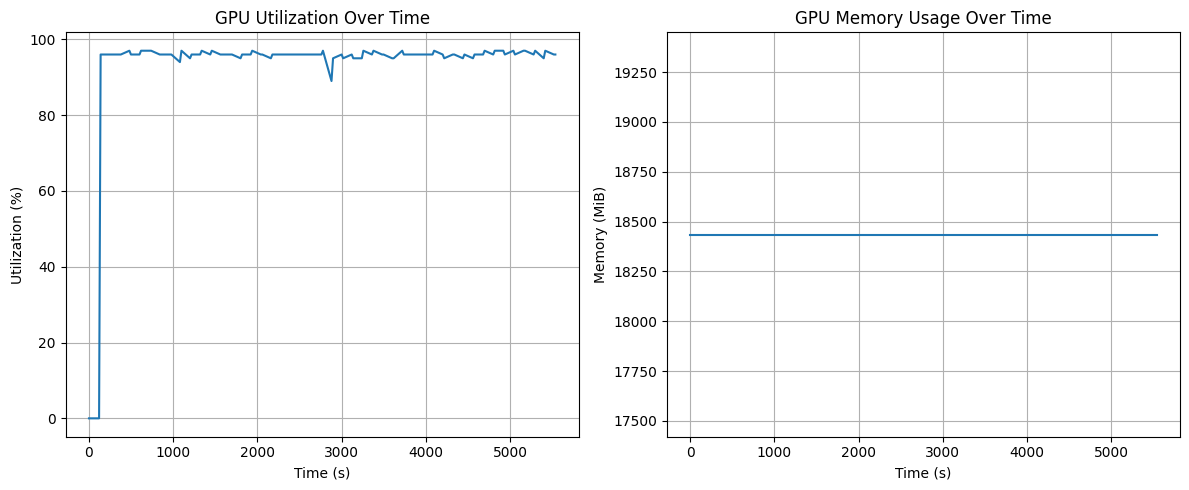


 Loading best model from: best_model_10M.pt 10MxLSTM
Completed


In [ ]:
import os
import zipfile
import requests
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import sys
import warnings
import time
warnings.filterwarnings("ignore")

import os
os.environ["TRITON_DEBUG"] = "1"
print("[INFO] Model initialized. Triton should log kernel compilation now.")

# import os
# # Required for Triton to run correctly in Colab
# os.environ["TRITON_DEBUG"] = "1"
os.environ["LD_LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["PATH"] += ":/usr/local/lib"

start_time = time.time()
t_epoch = 6
#10M
MOVIELENS_VERSION = "10M"  # Choose from: "100K", "1M", "10M", "20M"
MODEL_SELECTION = "xLSTM"  # Choose from: "LSTM", "xLSTM", "xLSTMLarge"

import threading
import subprocess
import time

gpu_utilization_log = []
gpu_memory_log = []
gpu_time_log = []


def monitor_gpu(interval=120):
    while True:
        output = subprocess.getoutput(
            "nvidia-smi --query-gpu=utilization.gpu,memory.used --format=csv,noheader,nounits"
        )
        util, mem = map(int, output.strip().split(','))
        gpu_utilization_log.append(util)
        gpu_memory_log.append(mem)
        gpu_time_log.append(time.time() - start_time)
        print(f"[GPU MONITOR] {util}% GPU, {mem} MiB")
        time.sleep(interval)


# Start GPU monitor thread
# monitor_thread = threading.Thread(target=monitor_gpu, daemon=True)
monitor_thread = threading.Thread(target=monitor_gpu, args=(120,), daemon=True)

monitor_thread.start()



train_seqs = {}
val_seqs = {}
test_seqs = {}

step_counter = 1
logged_users = set()
max_print_users = 5
log_lines = []
log_file_path = "training_logs.txt"


try:
    import wandb
    WANDB_AVAILABLE = True
    wandb.init(project="v8.4_xLSTM_10M", name="v8.4_10M-xLSTM", config={"epochs": 80})
except ImportError:
    WANDB_AVAILABLE = False

sys.path.append("../..")
from xlstm.xlstm_large.model import xLSTMLargeConfig, xLSTMLarge

# -----------------------------
# 1. Select MovieLens Dataset
# -----------------------------

dataset_urls = {
    "100K": "https://files.grouplens.org/datasets/movielens/ml-100k.zip",
    "1M": "https://files.grouplens.org/datasets/movielens/ml-1m.zip",
    "10M": "https://files.grouplens.org/datasets/movielens/ml-10m.zip",
    "20M": "https://files.grouplens.org/datasets/movielens/ml-20m.zip"
}

dataset_dirs = {
    "100K": "ml-100k",
    "1M": "ml-1m",
    "10M": "ml-10M100K",
    "20M": "ml-20m"
}

xlstm_params = {
    "100K": {"embedding_dim": 64, "num_heads": 2, "num_blocks": 1},
    "1M": {"embedding_dim": 96, "num_heads": 2, "num_blocks": 2},
    "10M": {"embedding_dim": 128, "num_heads": 2, "num_blocks": 2},
    "20M": {"embedding_dim": 256, "num_heads": 8, "num_blocks": 4}
}


dataloader_params = {
    "100K": {"batch_size": 128, "num_workers": 2},
    "1M": {"batch_size": 512, "num_workers": 2},
    "10M": {"batch_size": 1024, "num_workers": 2},
    "20M": {"batch_size": 1024, "num_workers": 2}
}


DATA_URL = dataset_urls[MOVIELENS_VERSION]
DATA_DIR = dataset_dirs[MOVIELENS_VERSION]

if not os.path.exists(DATA_DIR):
    print(f"Downloading MovieLens {MOVIELENS_VERSION} dataset...")
    r = requests.get(DATA_URL)
    zip_filename = f"{DATA_DIR}.zip"
    with open(zip_filename, "wb") as f:
        f.write(r.content)
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Extraction complete.")

# -----------------------------
# 2. Load and Preprocess Data
# -----------------------------
if MOVIELENS_VERSION == "100K":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "u.data"), sep="\t", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "u.item"), sep='|', encoding='latin-1', header=None, engine='python',
                         names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                                'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                                'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                                'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
    users = pd.read_csv(os.path.join(DATA_DIR, "u.user"), sep='|', header=None,
                        names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

elif MOVIELENS_VERSION == "1M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.dat"), sep="::", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.dat"), sep="::", engine='python',
                         names=['movie_id', 'title', 'genres'], encoding='latin-1')
    users = pd.read_csv(os.path.join(DATA_DIR, "users.dat"), sep="::", engine='python',
                        names=['user_id', 'gender', 'age', 'occupation', 'zip_code'])

elif MOVIELENS_VERSION == "10M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.dat"), sep="::", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.dat"), sep="::", engine='python',
                         names=['movie_id', 'title', 'genres'], encoding='latin-1')
    users = pd.DataFrame({'user_id': rating_df['user_id'].unique()})  # No user metadata

elif MOVIELENS_VERSION == "20M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.csv"))
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.csv"))
    users = pd.DataFrame({'user_id': rating_df['userId'].unique()})  # No user metadata

    rating_df.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'}, inplace=True)
    movies.rename(columns={'movieId': 'movie_id'}, inplace=True)

# -----------------------------
# Map User and Item IDs
# -----------------------------
rating_df.sort_values(by=['user_id', 'timestamp'], inplace=True)
user2id = {uid: i for i, uid in enumerate(rating_df['user_id'].unique())}
item2id = {iid: i for i, iid in enumerate(rating_df['movie_id'].unique())}
rating_df['user_id'] = rating_df['user_id'].map(user2id)
rating_df['movie_id'] = rating_df['movie_id'].map(item2id)

movie_titles = {item2id[row['movie_id']]: row['title'] for _, row in movies.iterrows() if row['movie_id'] in item2id}

if 'user_id' in users.columns:
    users['user_id'] = users['user_id'].map(user2id)
    users.dropna(subset=['user_id'], inplace=True)
    users['user_id'] = users['user_id'].astype(int)

if 'movie_id' in movies.columns:
    movies['movie_id'] = movies['movie_id'].map(item2id)
    movies.dropna(subset=['movie_id'], inplace=True)
    movies['movie_id'] = movies['movie_id'].astype(int)

rating_df = rating_df.merge(users, on='user_id', how='left')
rating_df = rating_df.merge(movies, on='movie_id', how='left')

num_users = len(user2id)
num_items = len(item2id)

print(f"Dataset: {MOVIELENS_VERSION}")
print(f"Length of ratings: {len(rating_df)}")
print(f"Shape: {rating_df.shape}")
print(f"Num users: {num_users}, Num items: {num_items}")

print(f"Length of the ratings: {len(rating_df)}")
print(f"Shape of the ratings dataframe: {rating_df.shape}")
print(rating_df.head())
# print(user2id)
# print(item2id)
# print(num_users)
# print(num_items)
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")

user_interactions = rating_df.groupby('user_id')['movie_id'].count()

# Average sequence length (i.e., avg number of interactions per user)
avg_seq_len = user_interactions.mean()

# Sparsity calculation
total_possible_interactions = num_users * num_items
actual_interactions = len(rating_df)
sparsity = 1.0 - (actual_interactions / total_possible_interactions)

# Print the results
print(f"\n[INFO] Additional Dataset Statistics:")
print(f"Average sequence length: {avg_seq_len:.2f}")
print(f"Sparsity score: {sparsity * 100:.2f}%")

# -----------------------------
# Step 1: Build Feature Dictionaries
# -----------------------------
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# -----------------------------
# Step 2: Construct Sequence Splits
# -----------------------------


MIN_CONTEXT = 5
MAX_LEN = 64

for uid, group in rating_df.groupby('user_id'):
    items = group['movie_id'].tolist()

    if len(items) <= MIN_CONTEXT + 2:
        continue

    # Disjoint splits
    train_items = items[:-2]
    val_item = items[-2]
    test_item = items[-1]

    # Floating training (allowed)
    train_seqs[uid] = train_items

    # Fixed validation: only predict next item once
    val_seqs[uid] = [(train_items, val_item)]

    # Fixed test: only predict the final item
    test_seqs[uid] = [(train_items + [val_item], test_item)]

# -----------------------------
# Step 3: Dataset Classes
# -----------------------------
class TrainDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, items in sequences.items():
            for i in range(1, len(items)):
                seq = items[max(0, i - max_len):i]
                target = items[i]
                self.samples.append((seq, target))
        self.max_len = max_len
        print(f"Train samples: {len(self.samples)}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

class TestDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, pairs in sequences.items():
            for seq, tgt in pairs:
                seq = seq[-max_len:]
                self.samples.append((seq, tgt))
        self.max_len = max_len

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

class EvalDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, pairs in sequences.items():
            for seq, tgt in pairs:
                seq = seq[-max_len:]
                self.samples.append((uid, seq, tgt))
        self.max_len = max_len

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        uid, seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

# -----------------------------
# Inspect train/val/test sequences
# -----------------------------

train_dataset = TrainDataset(train_seqs)

seq, target = train_dataset[0]
print("\n[DEBUG] Input sequence shape:", seq.shape)
print("[DEBUG] Example feature vector at t=0:", seq[0])
print("[DEBUG] Target vector:", target)


print("\n[INFO] Sample from train_seqs:")
for uid in list(train_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    print(f"Train sequence (movie_ids): {train_seqs[uid]}")
    print(f"Sequence length: {len(train_seqs[uid])}")

print("\n[INFO] Sample from val_seqs:")
for uid in list(val_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    print("Validation samples (prefix -> target):")
    for prefix, target in val_seqs[uid][:3]:  # Show first 3 (prefix, target) pairs
        print(f"  {prefix} -> {target}")

print("\n[INFO] Sample from test_seqs:")
for uid in list(test_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    prefix, target = test_seqs[uid][0]  # Only one test pair per user
    print(f"Test prefix: {prefix}")
    print(f"Test target: {target}")


# -----------------------------
# Step 4: DataLoaders
# -----------------------------
# train_loader = DataLoader(TrainDataset(train_seqs), batch_size=256, shuffle=True, num_workers=2)
# val_loader = DataLoader(EvalDataset(val_seqs), batch_size=256)
# test_loader = DataLoader(EvalDataset(test_seqs), batch_size=256)




dl_params = dataloader_params[MOVIELENS_VERSION]

train_loader = DataLoader(
    TrainDataset(train_seqs),
    batch_size=dl_params["batch_size"],
    shuffle=True,
    num_workers=dl_params["num_workers"]
)

val_loader = DataLoader(
    EvalDataset(val_seqs),
    batch_size=dl_params["batch_size"],
    num_workers=dl_params["num_workers"]
)

test_loader = DataLoader(
    EvalDataset(test_seqs),
    batch_size=dl_params["batch_size"],
    num_workers=dl_params["num_workers"]
)



inputs, targets = next(iter(train_loader))

print("[DEBUG] Input batch shape:", inputs.shape)    # (batch_size, max_len, feature_dim)
print("[DEBUG] Target batch shape:", targets.shape)  # (batch_size, feature_dim)

# Optional: print first sample
print("[DEBUG] First input sequence shape:", inputs[0].shape)
print("[DEBUG] First target vector:", targets[0])

# -----------------------------
# 4. Model Setup
# -----------------------------
# xlstm_config = xLSTMLargeConfig(
#     embedding_dim=256,
#     num_heads=4,
#     num_blocks=4,
#     vocab_size=num_items + 1,
#     return_last_states=True,
#     mode="inference",
#     chunkwise_kernel="chunkwise--triton_xl_chunk",
#     sequence_kernel="native_sequence__triton",
#     step_kernel="triton",
# )

if WANDB_AVAILABLE:
    wandb.init(
        project="xLSTM-MovieLens100K",
        name="val-and-lr-scheduler-30epochs",
        notes="1 feature, with val, 2 blocks, 2 heads,100K. Uses validation + LR scheduler. Max_len 50, Embd 128.",

        config={
            "epochs": 30,
            "train_batch_size": 256,
            "val_batch_size": 256,
            "max_len": 50,
            "embedding_dim": 128,
            "num_heads": 2,
            "num_blocks": 2,
            "learning_rate": 0.001,
            "num_users": num_users,
            "num_items": num_items,
            "dataset": "MovieLens-100K",
            "loss_fn": "CrossEntropyLoss"
        }
    )


# if MODEL_SELECTION == "LSTM":
#     class LSTMModel(nn.Module):
#       def __init__(self, num_items, embedding_dim=128, hidden_dim=128, num_layers=1):
#           super().__init__()
#           self.embedding = nn.Embedding(num_items, embedding_dim)
#           self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
#           self.output_layer = nn.Linear(hidden_dim, num_items)

#       def forward(self, x):
#           x = self.embedding(x)
#           out, _ = self.lstm(x)
#           out = out[:, -1, :]
#           logits = self.output_layer(out)
#           return logits
#     model = LSTMModel(num_items=num_items, embedding_dim=128)


# elif MODEL_SELECTION == "xLSTMLarge":
#     xlstm_config = xLSTMLargeConfig(
#         embedding_dim=256,
#         num_heads=4,
#         num_blocks=4,
#         vocab_size=num_items + 1,
#         return_last_states=True,
#         mode="inference",
#         chunkwise_kernel="chunkwise--triton_xl_chunk",
#         sequence_kernel="native_sequence__triton",
#         step_kernel="triton",
#     )
#     model = xLSTMLarge(xlstm_config)

# else:  # xLSTM (default)
#     xlstm_config = xLSTMLargeConfig(
#         embedding_dim=128,
#         num_heads=2,
#         num_blocks=2,
#         vocab_size=num_items + 1,
#         return_last_states=True,
#         mode="inference",
#         chunkwise_kernel="chunkwise--triton_xl_chunk",
#         sequence_kernel="native_sequence__triton",
#         step_kernel="triton",
#     )
#     model = xLSTMLarge(xlstm_config)


params = xlstm_params[MOVIELENS_VERSION]  # dynamically get config

if MODEL_SELECTION == "LSTM":
    class LSTMModel(nn.Module):
        def __init__(self, num_items, embedding_dim=128, hidden_dim=128, num_layers=1):
            super().__init__()
            self.embedding = nn.Embedding(num_items, embedding_dim)
            self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
            self.output_layer = nn.Linear(hidden_dim, num_items)

        def forward(self, x):
            x = self.embedding(x)
            out, _ = self.lstm(x)
            out = out[:, -1, :]
            logits = self.output_layer(out)
            return logits

    model = LSTMModel(
        num_items=num_items,
        embedding_dim=params["embedding_dim"],
        hidden_dim=params["embedding_dim"],  # You can make this separate if desired
        num_layers=1
    )

elif MODEL_SELECTION == "xLSTMLarge":
    xlstm_config = xLSTMLargeConfig(
        embedding_dim=params["embedding_dim"],
        num_heads=params["num_heads"],
        num_blocks=params["num_blocks"],
        vocab_size=num_items + 1,
        return_last_states=True,
        mode="inference",
        chunkwise_kernel="chunkwise--triton_xl_chunk",
        sequence_kernel="native_sequence__triton",
        step_kernel="triton",
    )
    model = xLSTMLarge(xlstm_config)

else:  # xLSTM (default)
    xlstm_config = xLSTMLargeConfig(
        embedding_dim=params["embedding_dim"],
        num_heads=params["num_heads"],
        num_blocks=params["num_blocks"],
        vocab_size=num_items + 1,
        return_last_states=True,
        mode="inference",
        chunkwise_kernel="chunkwise--triton_xl_chunk",
        sequence_kernel="native_sequence__triton",
        step_kernel="triton",
    )
    model = xLSTMLarge(xlstm_config)




# ✅ Compile the model after it's created
# model = torch.compile(model)
# model = torch.compile(model, fullgraph=True, dynamic=False)


# 🚀 Move to GPU (A100 etc.)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 🔧 Set up training components
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
recall_list, mrr_list, ndcg_list = [], [], []

best_recall = 0.0
save_path = f"best_model_{MOVIELENS_VERSION}.pt"

print(f"\nUsing device: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

# -----------------------------
# 5. Metrics
# -----------------------------
#Edit 1:
# def recall_mrr_ndcg_k(preds, targets, k=10):
#     recall, mrr, ndcg = 0.0, 0.0, 0.0
#     for pred, target in zip(preds, targets):
#         if target in pred[:k]:
#             rank = pred[:k].index(target)
#             recall += 1
#             mrr += 1.0 / (rank + 1)
#             ndcg += 1.0 / np.log2(rank + 2)
#     n = len(preds)
#     return recall / n, mrr / n, ndcg / n

#Edit2
def recall_mrr_ndcg_k(preds, targets, k=10):
    recall, mrr, ndcg = 0.0, 0.0, 0.0
    correct_hits = 0  # total number of times target was in top-k
    total_preds = len(preds)

    for pred, target in zip(preds, targets):
        if target in pred[:k]:
            rank = pred[:k].index(target)
            correct_hits += 1
            mrr += 1.0 / (rank + 1)
            ndcg += 1.0 / np.log2(rank + 2)

    recall = correct_hits / total_preds if total_preds > 0 else 0.0
    mrr = mrr / total_preds if total_preds > 0 else 0.0
    ndcg = ndcg / total_preds if total_preds > 0 else 0.0

    return recall, mrr, ndcg, correct_hits, total_preds


# -----------------------------
# 6. Training
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
recall_list, mrr_list, ndcg_list = [], [], []

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

print("\nStarting training...")
for epoch in range(t_epoch):
    model.train()
    total_loss = 0
    for seqs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        seqs, targets = seqs.to(device), targets.to(device)
        optimizer.zero_grad()

        # Edit 1:
        # logits = model(seqs)[0]
        # if logits.dim() == 3:
        #     logits = logits[:, -1, :]
        # loss = criterion(logits, targets)

        #Edit 2:
        # logits = model(seqs)  # output shape: [B, T, V]
        # if logits.dim() == 3:
        #     logits = logits[:, -1, :]  # final time step
        # targets = targets  # shape: [B]
        # # print("logits shape:", logits.shape)
        # # print("targets shape:", targets.shape)
        # loss = criterion(logits, targets)

        logits = model(seqs)
        if isinstance(logits, tuple):
            logits = logits[0]  # extract logits from tuple

        if logits.dim() == 3:
            logits = logits[:, -1, :]  # shape: [B, V]


        # Targets assumed to be shape [B] (index of next item)
        loss = criterion(logits, targets)

        #loss = criterion(logits, targets)

        # Compute predictions
        #top_preds = torch.topk(logits, k=1, dim=-1).indices.squeeze(1)  # shape: [B]

        top_preds = torch.topk(logits, k=1, dim=-1).indices.squeeze(1)
        top_10_preds = torch.topk(logits, k=10, dim=-1).indices  # shape [B, 10]

        # for b in range(seqs.size(0)):
        #     context_seq = seqs[b].tolist()
        #     target_item = targets[b].item()
        #     pred_item = top_preds[b].item()
        #     top_10_items = top_10_preds[b].tolist()
        #     loss_value = nn.functional.cross_entropy(
        #         logits[b].unsqueeze(0), targets[b].unsqueeze(0)
        #     ).item()
        #     status = "Valid" if pred_item == target_item else "InValid"
        #     trimmed_seq = [i for i in context_seq if i > 0]
        #     user_hash = hash(tuple(trimmed_seq))  # simulate UID

        #     # Rank of true target in the full logits
        #     sorted_logits = torch.argsort(logits[b], descending=True)
        #     try:
        #         rank = sorted_logits.tolist().index(target_item) + 1  # 1-based rank
        #     except ValueError:
        #         rank = -1  # should not happen unless target is out of vocab

        #     log_line = (
        #         f"Step = {step_counter}, User: {user_hash}, "
        #         f"Training Seq = {trimmed_seq}, "
        #         f"Target = [{target_item}], Pred = [{pred_item}], "
        #         f"Status = \"{status}\", Loss = [{loss_value:.4f}], "
        #         f"Recall@10 = {top_10_items}, Rank = [{rank}]"
        #     )
        #     log_lines.append(log_line)

        #     if user_hash not in logged_users and len(logged_users) < max_print_users:
        #         print(log_line)
        #         logged_users.add(user_hash)

        #     step_counter += 1

        DEBUG_LOGGING = False  # ✅ set to True only for debugging first few batches

        if DEBUG_LOGGING:
            for b in range(seqs.size(0)):
                context_seq = seqs[b].tolist()
                target_item = targets[b].item()
                pred_item = top_preds[b].item()
                top_10_items = top_10_preds[b].tolist()
                loss_value = nn.functional.cross_entropy(
                    logits[b].unsqueeze(0), targets[b].unsqueeze(0)
                ).item()
                status = "Valid" if pred_item == target_item else "InValid"
                trimmed_seq = [i for i in context_seq if i > 0]
                user_hash = hash(tuple(trimmed_seq))

                sorted_logits = torch.argsort(logits[b], descending=True)
                try:
                    rank = sorted_logits.tolist().index(target_item) + 1
                except ValueError:
                    rank = -1

                log_line = (
                    f"Step = {step_counter}, User: {user_hash}, "
                    f"Training Seq = {trimmed_seq}, "
                    f"Target = [{target_item}], Pred = [{pred_item}], "
                    f"Status = \"{status}\", Loss = [{loss_value:.4f}], "
                    f"Recall@10 = {top_10_items}, Rank = [{rank}]"
                )
                log_lines.append(log_line)

                if user_hash not in logged_users and len(logged_users) < max_print_users:
                    print(log_line)
                    logged_users.add(user_hash)

                step_counter += 1




        loss.backward()
        optimizer.step()
        total_loss += loss.item()


    # Evaluate on test set
    model.eval()
    all_preds, all_targets = [], []

    # with torch.no_grad():
    #     for seqs, targets in test_loader:
    #         seqs = seqs.to(device)
    #         logits = model(seqs)
    #         if isinstance(logits, tuple):
    #             logits = logits[0]
    #         if logits.dim() == 3:
    #             logits = logits[:, -1, :]

    #         topk = torch.topk(logits, k=10, dim=-1).indices.cpu().tolist()  # already a list of lists
    #         all_preds.extend(topk)
    #         all_targets.extend(targets.tolist())

    with torch.no_grad():
        for seqs, targets in test_loader:
            seqs = seqs.to(device)
            logits = model(seqs)
            if isinstance(logits, tuple):
                logits = logits[0]
            if logits.dim() == 3:
                logits = logits[:, -1, :]
            topk = torch.topk(logits, k=10, dim=-1).indices.cpu().tolist()
            all_preds.extend(topk)
            all_targets.extend(targets.tolist())

    # with torch.no_grad():
    #     for seqs, targets in test_loader:  # <- FIXED LINE
    #         seqs = seqs.to(device)
    #         logits = model(seqs)[0]
    #         if logits.dim() == 3:
    #             logits = logits[:, -1, :]
    #         topk = torch.topk(logits, k=10, dim=-1).indices.cpu().tolist()
    #         # all_preds.extend(topk)
    #         all_preds.extend(topk.tolist())
    #         all_targets.extend(targets.tolist())

    recall, mrr, ndcg, correct_hits, total_preds = recall_mrr_ndcg_k(all_preds, all_targets)
    #recall, mrr, ndcg = recall_mrr_ndcg_k(all_preds, all_targets)
    recall_list.append(recall)
    mrr_list.append(mrr)
    ndcg_list.append(ndcg)

    #print(f"Epoch {epoch+1} | Loss: {total_loss:.2f} | Recall@10: {recall:.4f} | MRR@10: {mrr:.4f} | NDCG@10: {ndcg:.4f}")
    print(f"Epoch {epoch+1} | Loss: {total_loss:.2f} | Recall@10: {recall:.4f} "
      f"({correct_hits}/{total_preds}) | MRR@10: {mrr:.4f} | NDCG@10: {ndcg:.4f}")

    # if recall > best_recall:
    #     best_recall = recall
    #     torch.save(model.state_dict(), save_path)
    #     print(f" Saved new best model (Recall@10 = {recall:.4f}) to {save_path}")

    patience = 3
    epochs_no_improve = 0

    if recall > best_recall:
        best_recall = recall
        torch.save(model.state_dict(), save_path)
        print(f"Saved new best model (Recall@10 = {recall:.4f}) to {save_path}")
        epochs_no_improve = 0  # reset on improvement
    else:
        epochs_no_improve += 1
        print(f" No improvement for {epochs_no_improve} epoch(s)")

    if epochs_no_improve >= patience:
        print(f"\n Early stopping triggered. No improvement for {patience} consecutive epochs.")
        break

    if WANDB_AVAILABLE:
        wandb.log({"loss": total_loss, "recall@10": recall, "mrr@10": mrr, "ndcg@10": ndcg})


print(f"\n Loading best model from: {save_path}")
model.load_state_dict(torch.load(save_path, map_location=device))
model.to(device)
model.eval()
# -----------------------------
# 7. Plot
# -----------------------------
plt.figure()
plt.plot(recall_list, label='Recall@10')
plt.plot(mrr_list, label='MRR@10')
plt.plot(ndcg_list, label='NDCG@10')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Test Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

elapsed_minutes = (time.time() - start_time) / 60
print(f"\nTotal run time: {elapsed_minutes:.2f} minutes")

# -----------------------------
# 8. Sample Predictions
# -----------------------------
sample_dataset = EvalDataset(test_seqs, max_len=MAX_LEN)
sample_loader = DataLoader(sample_dataset, batch_size=1, shuffle=True)

with torch.no_grad():
    for i, (seq_tensor, target_tensor) in enumerate(sample_loader):
        # uid = uid_tensor.item()
        input_seq = seq_tensor.to(device)
        target = target_tensor.item()

        logits = model(input_seq)[0]
        if logits.dim() == 3:
            logits = logits[:, -1, :]

        probs = torch.softmax(logits, dim=-1)
        topk_logits = torch.topk(logits, k=10, dim=-1)
        topk_probs = torch.topk(probs, k=10, dim=-1)

        topk_items = topk_probs.indices.squeeze().tolist()
        topk_scores = topk_probs.values.squeeze().tolist()
        topk_raw_logits = topk_logits.values.squeeze().tolist()

        input_ids = seq_tensor.squeeze().tolist()
        print(f"\nUser ID: {uid}")
        print("Input sequence:")
        for m in input_ids:
            if m > 0:
                print(f"  - Item {m}: {movie_titles.get(m, 'Unknown')}")

        true_movie = movie_titles.get(target, f"Item {target}")
        # true_prob = probs[0, target].item()
        # true_logit = logits[0, target].item()
        true_prob = probs.view(-1)[target].item()
        true_logit = logits.view(-1)[target].item()

        print(f"True next item: Item {target}: {true_movie} (logit: {true_logit:.4f}, confidence: {true_prob:.4f})")

        print("Top-10 Predictions with scores:")
        for rank, (item, logit_score, prob_score) in enumerate(zip(topk_items, topk_raw_logits, topk_scores), start=1):
            movie_name = movie_titles.get(item, f"Item {item}")
            print(f"  {rank}. Item {item}: {movie_name} (logit: {logit_score:.4f}, confidence: {prob_score:.4f})")

        if i == 4:
            break


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(gpu_time_log, gpu_utilization_log)
plt.title("GPU Utilization Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Utilization (%)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(gpu_time_log, gpu_memory_log)
plt.title("GPU Memory Usage Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Memory (MiB)")
plt.grid(True)

plt.tight_layout()
plt.show()


print(f"\n Loading best model from: {save_path} {MOVIELENS_VERSION}{MODEL_SELECTION}")
print("Completed")

In [ ]:
!pip install mlstm_kernels
!pip install xlstm

# # OR, for development, from source:
# !pip install -e .

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.0/349.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink